<a href="https://colab.research.google.com/github/Ayush-ak87/Data-science-/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/rashida048/datasets/master/home_data.csv')

In [ ]:
df1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
df1.drop(['id','date'], axis=1 , inplace=True)
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [ ]:
df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df1.nunique()

price            4032
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

# Data Preprocessing

In [ ]:
#changing float to int
df1['bathrooms'] = df1['bathrooms'].astype(int)
df1['floors'] = df1['floors'].astype(int)

In [ ]:
#changing the columns yr_built to age
df1.rename(columns={'yr_built':'age'}, inplace=True)
df1['age'] = 2023-df1['age']

In [ ]:
#changing the columns yr_renovated to renovate and changing value from 0 to 1
df1.rename(columns={'yr_renovated':'renovate'}, inplace=True)
df1['renovate'] = df1['renovate'].apply(lambda x:0 if x==0 else 1)

In [31]:
#using simple feature scaling to normalize the data
df1['sqft_living'] = df1['sqft_living']/df1['sqft_living'].max()
df1['sqft_living15'] = df1['sqft_living15']/df1['sqft_living15'].max()
df1['sqft_lot'] = df1['sqft_lot']/df1['sqft_lot'].max()
df1['sqft_above'] = df1['sqft_above']/df1['sqft_above'].max()
df1['sqft_basement'] = df1['sqft_basement']/df1['sqft_basement'].max()
df1['sqft_lot15'] = df1['sqft_lot15']/df1['sqft_lot15'].max()

In [32]:
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovate,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1,0.087149,0.003421,1,0,0,3,7,0.125399,0.000000,68,0,98178,47.5112,-122.257,0.215781,0.006485
1,538000,3,2,0.189808,0.004385,2,0,0,3,7,0.230606,0.082988,72,1,98125,47.7210,-122.319,0.272142,0.008768
2,180000,2,1,0.056869,0.006056,1,0,0,3,6,0.081828,0.000000,90,0,98028,47.7379,-122.233,0.438003,0.009254
3,604000,4,3,0.144756,0.003028,1,0,0,5,7,0.111583,0.188797,58,0,98136,47.5208,-122.393,0.219002,0.005739
4,510000,3,2,0.124077,0.004893,1,0,0,3,8,0.178533,0.000000,36,0,98074,47.6168,-122.045,0.289855,0.008612


# Exploratory Data Analysis

In [34]:
#finding correlation between others variables
df1.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.510072
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.237211
renovate         0.126092
sqft_lot         0.089661
sqft_lot15       0.082447
condition        0.036362
long             0.021626
zipcode         -0.053203
age             -0.054012
Name: price, dtype: float64

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster

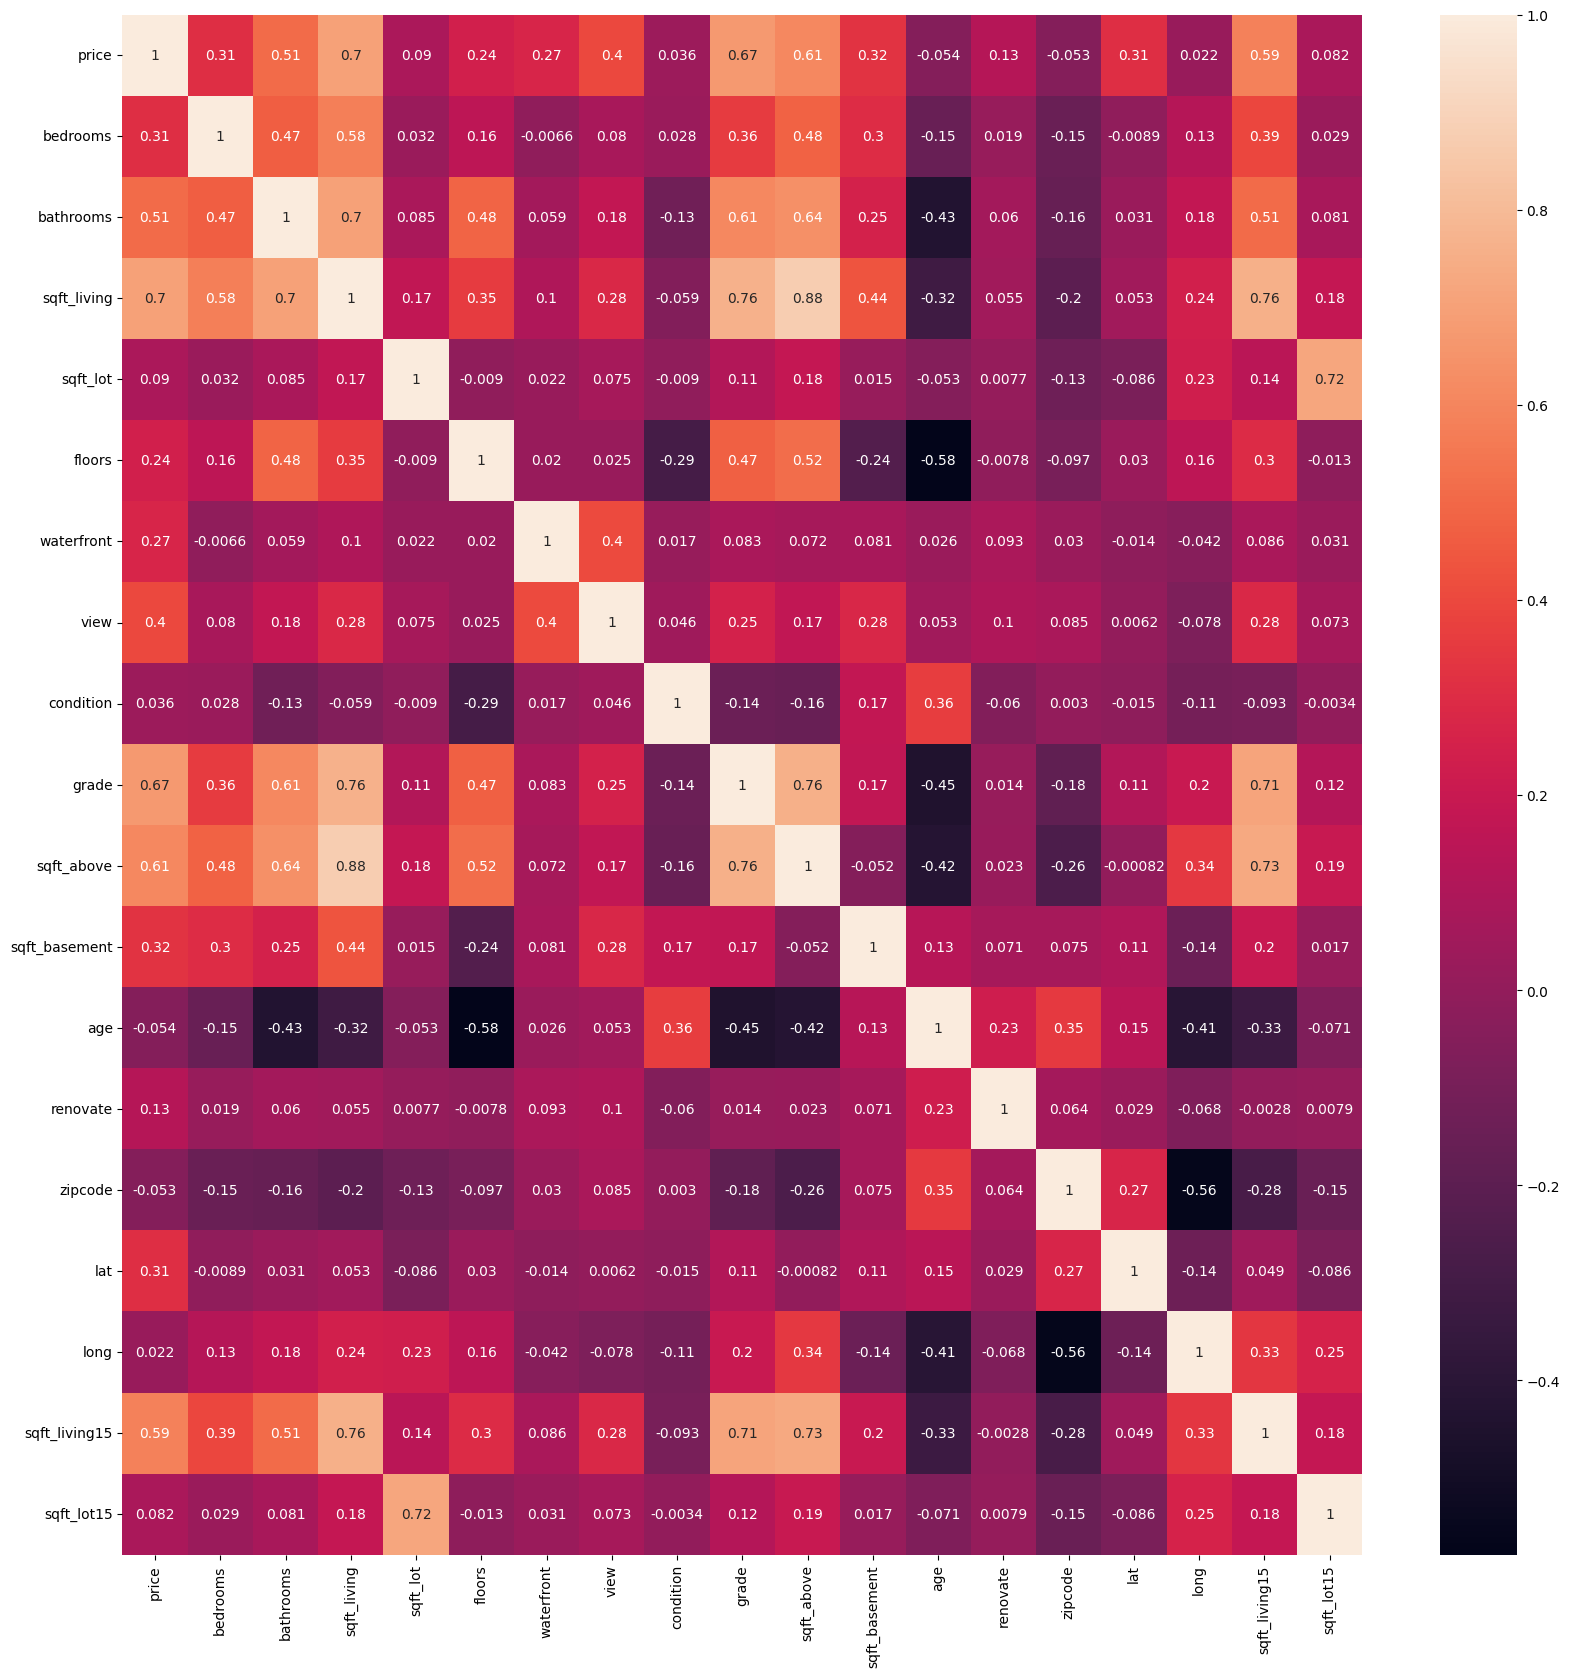

In [36]:
plt.figure(figsize = (20,20))
sns.heatmap(df1.corr(),annot = True)
plt.show()

Visualizing the correlation with Price

<Axes: >

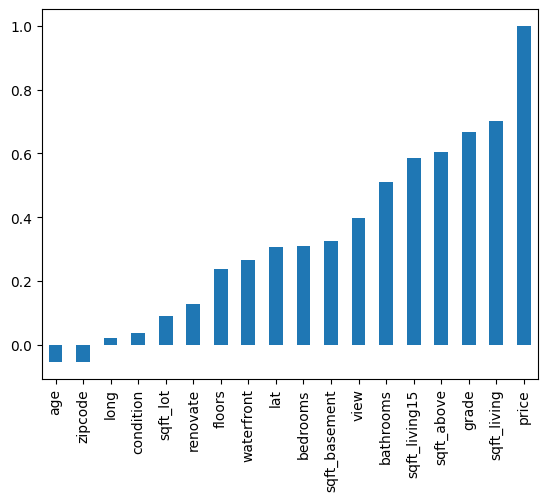

In [40]:
df1.corr()['price'][:-1].sort_values().plot(kind = 'bar')

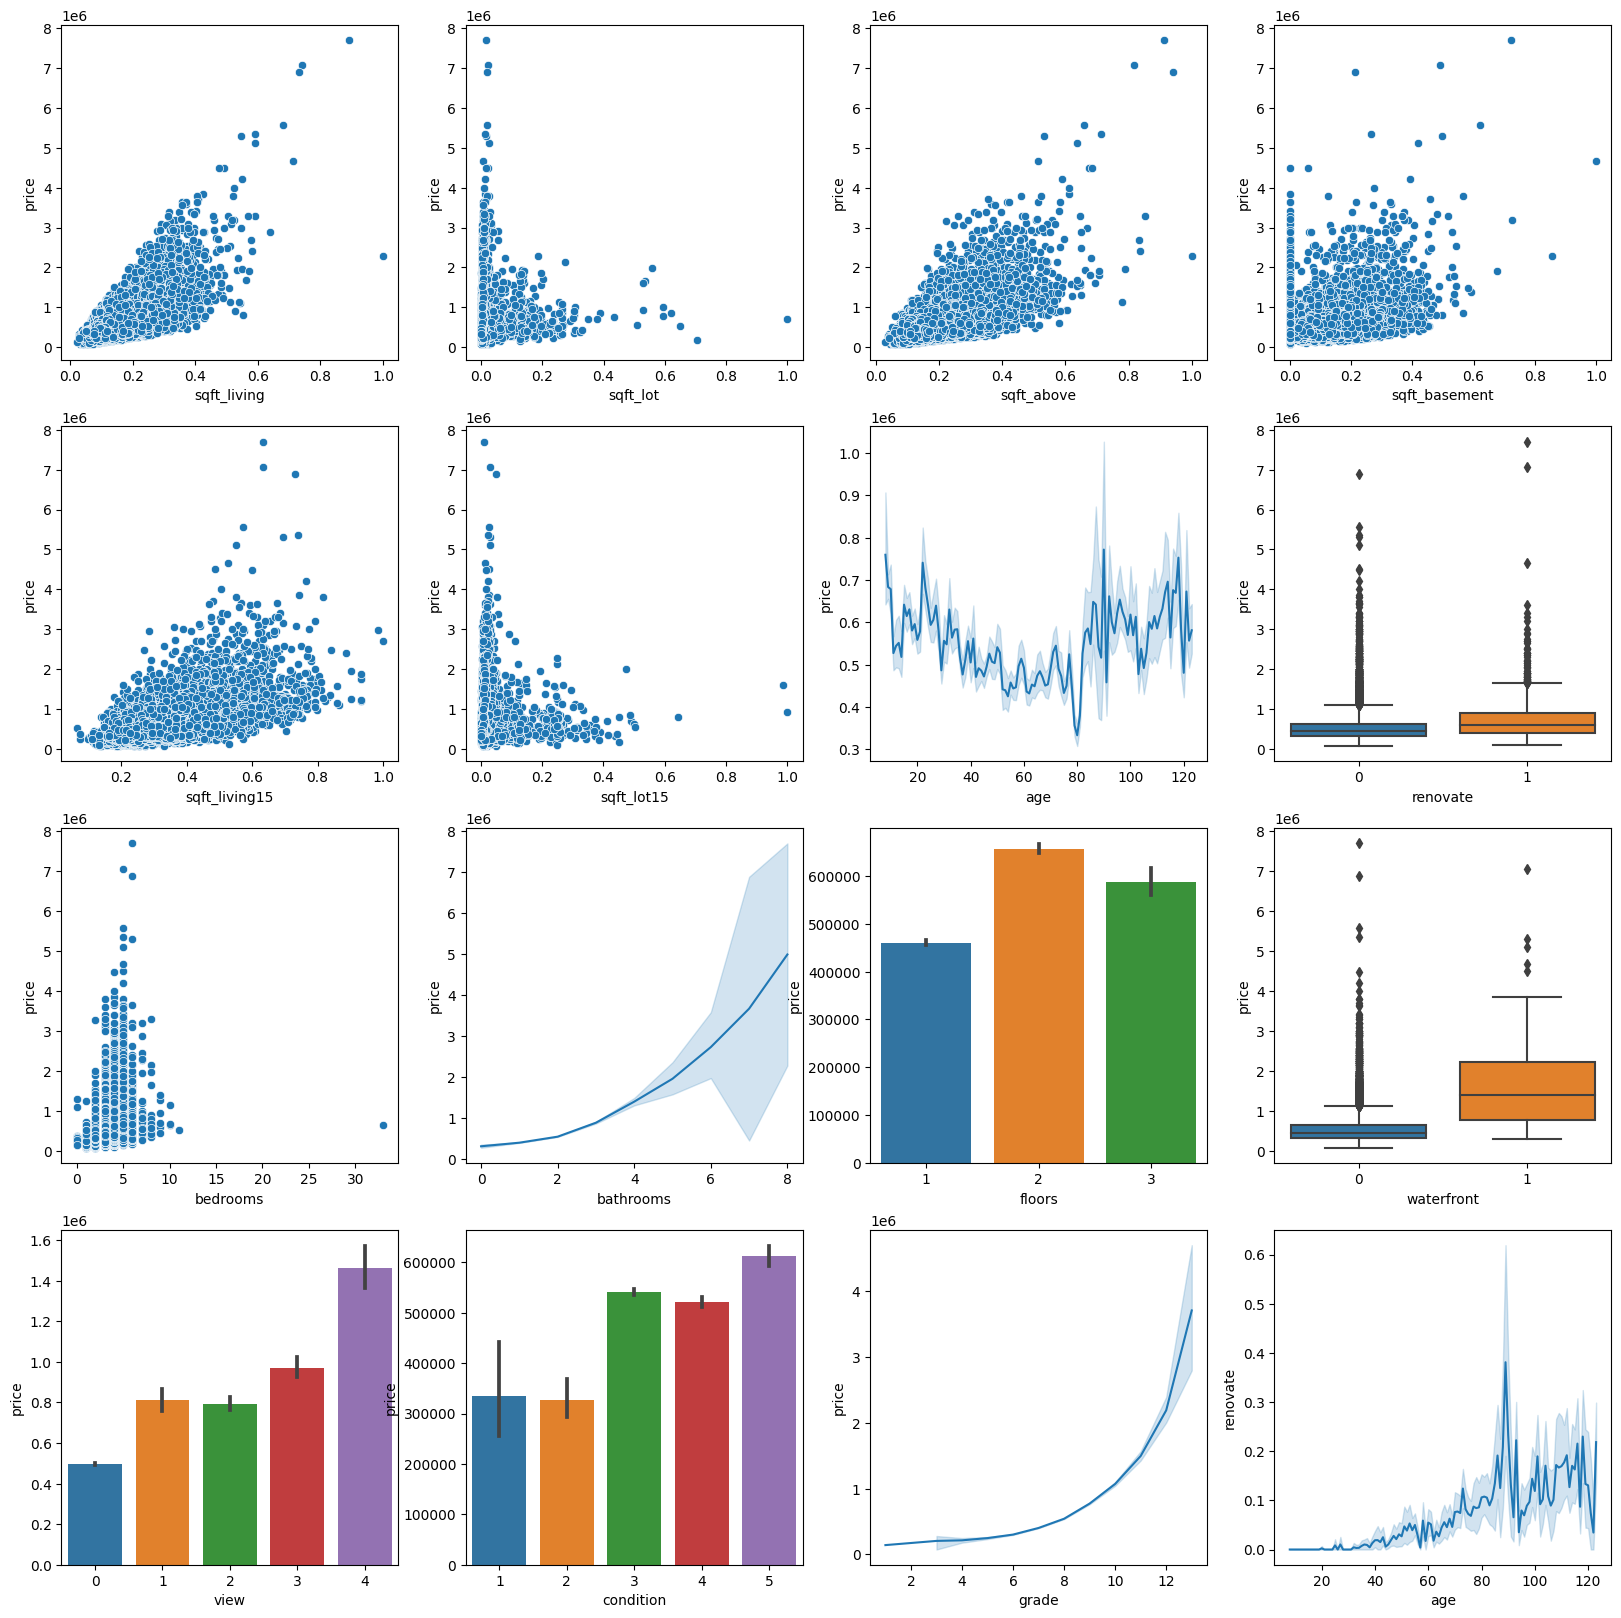

In [43]:
#visualizing the relation between others parameters
fig, ax = plt.subplots(4,4,figsize=(20,20))
sns.scatterplot( x = df1['sqft_living'], y = df1['price'],ax=ax[0,0])
sns.scatterplot( x = df1['sqft_lot'], y = df1['price'],ax=ax[0,1])
sns.scatterplot( x = df1['sqft_above'], y = df1['price'],ax=ax[0,2])
sns.scatterplot( x = df1['sqft_basement'], y = df1['price'],ax=ax[0,3])
sns.scatterplot( x = df1['sqft_living15'], y = df1['price'],ax=ax[1,0])
sns.scatterplot( x = df1['sqft_lot15'], y = df1['price'],ax=ax[1,1])
sns.lineplot( x = df1['age'], y = df1['price'],ax=ax[1,2])
sns.boxplot( x = df1['renovate'], y = df1['price'],ax=ax[1,3])
sns.scatterplot( x = df1['bedrooms'], y = df1['price'],ax=ax[2,0])
sns.lineplot( x = df1['bathrooms'], y = df1['price'],ax=ax[2,1])
sns.barplot( x = df1['floors'], y = df1['price'],ax=ax[2,2])
sns.boxplot( x = df1['waterfront'], y = df1['price'],ax=ax[2,3])
sns.barplot( x = df1['view'], y = df1['price'],ax=ax[3,0])
sns.barplot( x = df1['condition'], y = df1['price'],ax=ax[3,1])
sns.lineplot( x = df1['grade'], y = df1['price'],ax=ax[3,2])
sns.lineplot( x = df1['age'], y = df1['renovate'],ax=ax[3,3])
plt.show()

In [44]:
#adding new columns price-range categorised into 4 categories
df1['price-range'] = pd.cut(df1['price'],bins=[0,321950,450000,645000,1295648], labels=['low','medium','high','very-high'])

In [45]:
map = folium.Map(location=[47.5480, -121.9836],zoom_start=8)
marker_cluster = FastMarkerCluster(df1[['lat', 'long']].values.tolist()).add_to(map)
map

In [48]:
df1.drop(['price-range'],axis=1,inplace=True)

Train/Test Split

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1.drop('price',axis=1),df1['price'],test_size=0.3,random_state=10)

# Model Training

In [52]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [56]:
input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('model',LinearRegression())]
pipe = Pipeline(input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [57]:
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.8271774069875466

In [58]:
#testing the model
pipe_pred = pipe.predict(x_test)

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [62]:
r2_score(y_test,pipe_pred)

0.8271774069875466

# Ridge Regression

In [63]:
from sklearn.linear_model import Ridge
Ridgemodel = Ridge(alpha = 0.001)
Ridgemodel

Ridge(alpha=0.001)

In [64]:
# training the model
Ridgemodel.fit(x_train,y_train)
Ridgemodel.score(x_test,y_test)

0.712322059327517

In [65]:
#testing the model
r_pred = Ridgemodel.predict(x_test)
r2_score(y_test,r_pred)

0.712322059327517

# Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor

RandomForestRegressor(random_state=0)

In [67]:
# training the model
regressor.fit(x_train,y_train)
regressor.score(x_test,y_test)

0.878968081057204

In [68]:
#testing the model
yhat = regressor.predict(x_test)
r2_score(y_test,yhat)

0.878968081057204

# Model Evaluation

<ipython-input-69-537652003a6d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,ax=ax[0])
<ipython-input-69-537652003a6d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pipe_pred,ax=ax[0])
<ipython-input-69-537652003a6d>:5: UserWarning: 

`distplot` is a deprecated function and will be

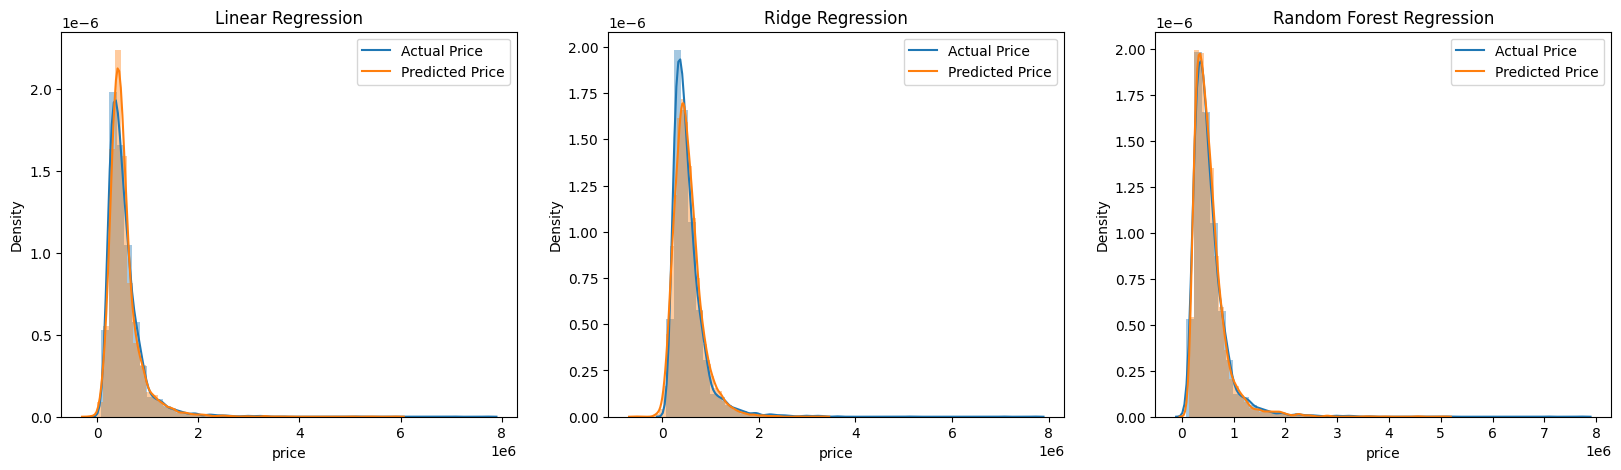

In [69]:
# displot of the actual price and predicted price for all models
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(y_test,ax=ax[0])
sns.distplot(pipe_pred,ax=ax[0])
sns.distplot(y_test,ax=ax[1])
sns.distplot(r_pred,ax=ax[1])
sns.distplot(y_test,ax=ax[2])
sns.distplot(yhat,ax=ax[2])
# legends
ax[0].legend(['Actual Price','Predicted Price'])
ax[1].legend(['Actual Price','Predicted Price'])
ax[2].legend(['Actual Price','Predicted Price'])
#model name as title
ax[0].set_title('Linear Regression')
ax[1].set_title('Ridge Regression')
ax[2].set_title('Random Forest Regression')
plt.show()

# Error Evaluation

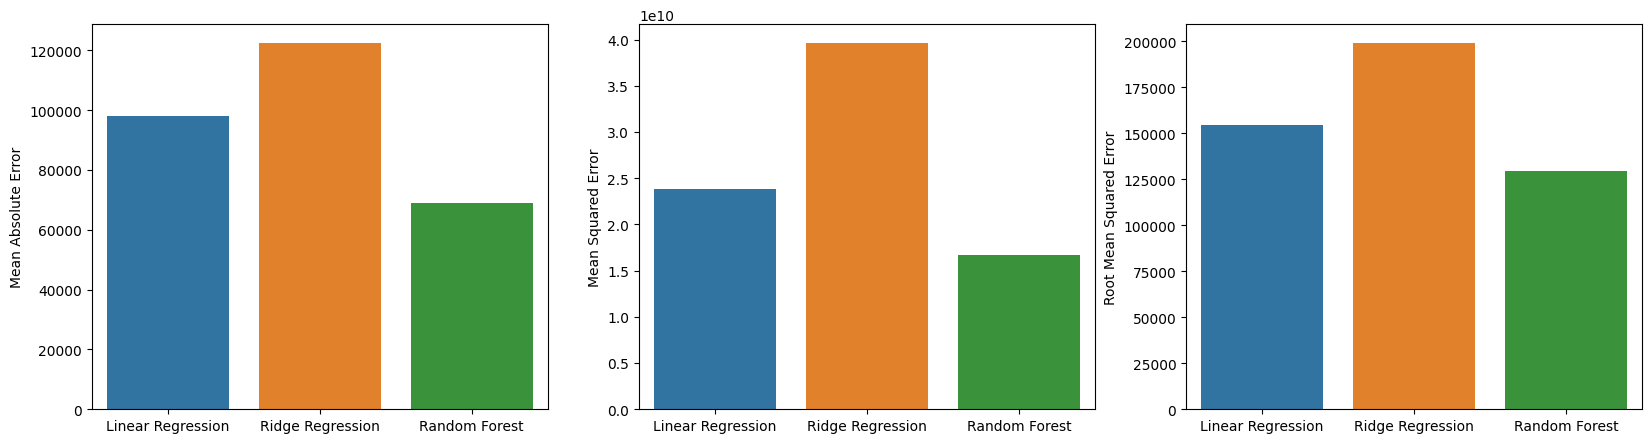

In [70]:
#plot the graph to compare mae, mse, rmse for all models
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest'],y=[mean_absolute_error(y_test,pipe_pred),mean_absolute_error(y_test,r_pred),mean_absolute_error(y_test,yhat)],ax=ax[0])
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest'],y=[mean_squared_error(y_test,pipe_pred),mean_squared_error(y_test,r_pred),mean_squared_error(y_test,yhat)],ax=ax[1])
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest'],y=[np.sqrt(mean_squared_error(y_test,pipe_pred)),np.sqrt(mean_squared_error(y_test,r_pred)),np.sqrt(mean_squared_error(y_test,yhat))],ax=ax[2])
# label for the graph
ax[0].set_ylabel('Mean Absolute Error')
ax[1].set_ylabel('Mean Squared Error')
ax[2].set_ylabel('Root Mean Squared Error')
plt.show()

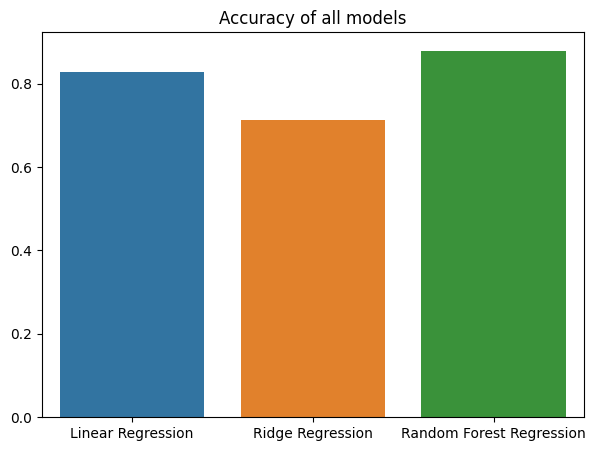

In [71]:
# plot accuracy of all models in the same graph
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest Regression'],y=[metrics.r2_score(y_test,pipe_pred),metrics.r2_score(y_test,r_pred),metrics.r2_score(y_test,yhat)])
ax.set_title('Accuracy of all models')
plt.show()

In [72]:
#input the values
bedrooms = 3
bathrooms = 2
sqft_living = 2000
sqft_lot = 10000
floors = 2
waterfront = 0
view = 0
condition = 3
grade = 8
sqft_above = 2000
sqft_basement = 0
yr_built = 1990
yr_renovated = 0
zipcode = 98001
lat = 47.5480
long = -121.9836
sqft_living15 = 2000
sqft_lot15 = 10000

In [73]:
#predicting the price using random forest regression
price = regressor.predict([[bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15]])
print('The price of the house is $',price[0])

The price of the house is $ 1078694.0533333335


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Conclusion
From the analysis, we can see that the Random Forest Regression model performed better than the Ridge Regression model and Polynomial Regression model.